In [0]:
from tensorflow import keras
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

preliminary simple model - kyle

In [0]:
model = keras.Sequential()
#
#model.add(keras.layers.Dense(1000))
model.add(keras.layers.Conv2D(64,(3,3),2,activation='relu',input_shape=(175,175,3)))
model.add(keras.layers.Conv2D(256,(4,4),2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='sigmoid'))
model.add(keras.layers.Dense(91875,activation='sigmoid'))
model.add(keras.layers.Reshape((175,175,3)))


In [0]:
# model=Sequential()
# layer=Dense(64,init=‘glorot_uniform’,input_shape=(784,))
# layer.trainable=False
# model.add(layer)
# layer2=Dense(784, activation=‘sigmoid’,init=‘glorot_uniform’)
# layer2.trainable=True
# model.add(layer2)
# model.compile(loss=‘relu’, optimizer=sgd,metrics = [‘mae’])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 87, 87, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 256)       262400    
_________________________________________________________________
flatten (Flatten)            (None, 451584)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               231211520 
_________________________________________________________________
dense_1 (Dense)              (None, 91875)             47131875  
_________________________________________________________________
reshape (Reshape)            (None, 175, 175, 3)       0         
Total params: 278,607,587
Trainable params: 278,607,587
Non-trainable params: 0
__________________________________________

In [0]:
model.compile(optimizer='nadam',loss='mse')



In [0]:
model.fit(kyle,kyle,epochs=5,batch_size=100)



Epoch 1/5
 100/1000 [==>...........................] - ETA: 1:15 - loss: 0.0192

ResourceExhaustedError: ignored

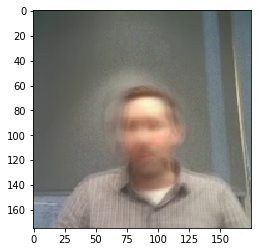

In [0]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model.predict(np.array([kyle[800]]))[0],cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
pwd

'/content/drive/My Drive'

In [0]:
tyler=np.load('tyler.npy')

Swapping

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model

In [0]:
kyle = np.load('drive/My Drive/kyles.npy')
tyler = np.load('drive/My Drive/tyler.npy')

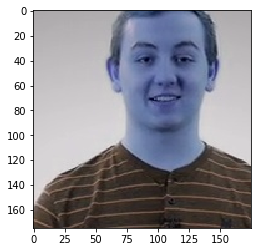

In [0]:
from matplotlib import pyplot as plt
plt.imshow(np.array([tyler[800]])[0])
plt.show()

model 1 - kyle

In [0]:
kyle.shape

(1000, 175, 175, 3)

In [0]:
x = Input(shape=(175,175,3))

conv1_1 = Conv2D(16, (3,3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2,2), padding='same')(conv1_1)
conv1_2 = Conv2D(8,(3,3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2,2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3,3), activation='relu', padding='same')(pool2) #why are the dimensions like this?
h = MaxPooling2D((2,2), padding='same')(conv1_3)

conv2_1 = Conv2D(8,(3,3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2,2))(conv2_1)
conv2_2 = Conv2D(8,(3,3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2,2))(conv2_2)
conv2_3 = Conv2D(16,(3,3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2,2))(conv2_3)
r = Conv2D(3, (2,2), activation='sigmoid', padding='valid')(up3)

model_K = Model(x,r)
model_K.compile(optimizer='adam', loss='mse')

In [0]:
model_K.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 175, 175, 3)]     0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 175, 175, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 88, 88, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 88, 88, 8)         1160      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 44, 44, 8)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 44, 44, 8)         584       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 22, 22, 8)         0   

In [0]:
#kyle1=np.array([k[:175,:175] for k in kyle])
model_K.fit(kyle,kyle,epochs=10,batch_size=100)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0059
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0044
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.0039
Epoch 4/10
 500/1000 [==============>...............] - ETA: 1s - loss: 0.0037

KeyboardInterrupt: ignored

In [0]:
# import tensorflow as tf
# tf.saved_model.save(model_K, '/content')


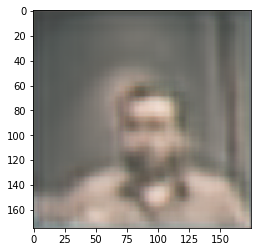

In [0]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model_K.predict(np.array([kyle[850]]))[0],cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
model_K.get_weights()

[array([[[[ 0.1085842 ,  0.01956281, -0.10803742,  0.11185355,
           -0.06183144,  0.00775587,  0.1136226 , -0.10071828,
            0.14952846,  0.05001865, -0.02337339,  0.03404468,
            0.12608649, -0.11475312, -0.16899462,  0.19184749],
          [ 0.0520713 ,  0.09573226, -0.02184413, -0.08440223,
            0.01627822,  0.05686392,  0.04293785, -0.16891319,
           -0.01470582,  0.08673058,  0.11542481,  0.17530403,
            0.12676205,  0.05145332, -0.05336358,  0.13609499],
          [ 0.17340629,  0.02583511, -0.0159356 ,  0.07441574,
           -0.09615913, -0.09995589,  0.1725755 , -0.03109657,
            0.00921335, -0.06194029,  0.14907119,  0.04797437,
            0.00206298,  0.17662878, -0.03900395,  0.02430558]],
 
         [[-0.00534797,  0.04811304,  0.20253687, -0.15033524,
           -0.05669412,  0.11756703, -0.08041225, -0.03753308,
            0.00511493, -0.1409654 , -0.07219667, -0.02416876,
           -0.0241929 ,  0.09336402,  0.04299592,

In [0]:
model_K=Model(x,r)

In [0]:
model_K.compile(optimizer='adam', loss='mse')

In [0]:
#freeze kyle's encoder
#save kyle's decoder


conv1_1.trainable= False
pool1.trainable= False
conv1_2.trainable = False
pool2.trainable = False
conv1_3.trainable = False
h.trainable = False

conv2_1.trainable = False
up1.trainable = False
conv2_2.trainable = False
up2.trainable = False
conv2_3.trainable = False
up3.trainable = False
r.trainable = False



In [0]:
#train on tyler
#sub in kyle's decoder







In [0]:
#regular model for Tyler

y = Input(shape=(175,175,3))

convT1_1 = Conv2D(16, (3,3), activation='relu', padding='same')(y)
poolT1 = MaxPooling2D((2,2), padding='same')(convT1_1)
convT1_2 = Conv2D(8,(3,3), activation='relu', padding='same')(poolT1)
poolT2 = MaxPooling2D((2,2), padding='same')(convT1_2)
convT1_3 = Conv2D(8, (3,3), activation='relu', padding='same')(poolT2)
Th = MaxPooling2D((2,2), padding='same')(convT1_3)

convT2_1 = Conv2D(8,(3,3), activation='relu', padding='same')(Th)
upT1 = UpSampling2D((2,2))(convT2_1)
convT2_2 = Conv2D(8,(3,3), activation='relu', padding='same')(upT1)
upT2 = UpSampling2D((2,2))(convT2_2)
convT2_3 = Conv2D(16,(3,3), activation='relu', padding='same')(upT2)
upT3 = UpSampling2D((2,2))(convT2_3)
Tr = Conv2D(3, (2,2), activation='sigmoid', padding='valid')(upT3)

model_T = Model(y,Tr)
model_T.compile(optimizer='adam', loss='mse')

In [0]:
model_T.fit(tyler,tyler,epochs=10,batch_size=100)

Epoch 1/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0055
Epoch 2/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0053
Epoch 3/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0050
Epoch 4/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0048
Epoch 5/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0045
Epoch 6/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0044
Epoch 7/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0043
Epoch 8/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0042
Epoch 9/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0041
Epoch 10/10
1789/1789 [==============================] - 5s 3ms/sample - loss: 0.0040


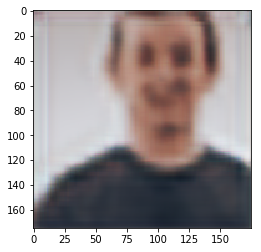

In [0]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(model_T.predict(np.array([tyler[800]]))[0],cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
tyler.shape


(1789, 175, 175, 3)

In [0]:
pwd

'/content'

In [0]:
## saving

saver = tf.train.Saver()



In [0]:
## restoring
# with tf.Session() as sess:
#     # To initialize values with saved data
#     saver.restore(sess, 'results/model.ckpt.data-1000-00000-of-00001')
#     print(sess.run(global_step_tensor)) # returns 1000